In [1]:
import pandas as pd

df_train = pd.read_csv("data/smote/dataframe_train.csv")
df_test = pd.read_csv("data/smote/dataframe_test.csv")

In [2]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,...,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,FlagImpaye
0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,20.0,0.0,27134,1,2,2017,7,32,14,0
1,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,1.0,2.0,...,40.0,0.0,27817,1,2,2017,7,43,37,0
2,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28058,1,2,2017,7,47,38,0
3,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,...,40.0,0.0,28128,1,2,2017,7,48,48,0
4,26.90,1,0.0,0.0,0.0,549.0,0.0,0.0,1.0,1.0,...,40.0,0.0,29607,1,2,2017,8,13,27,0


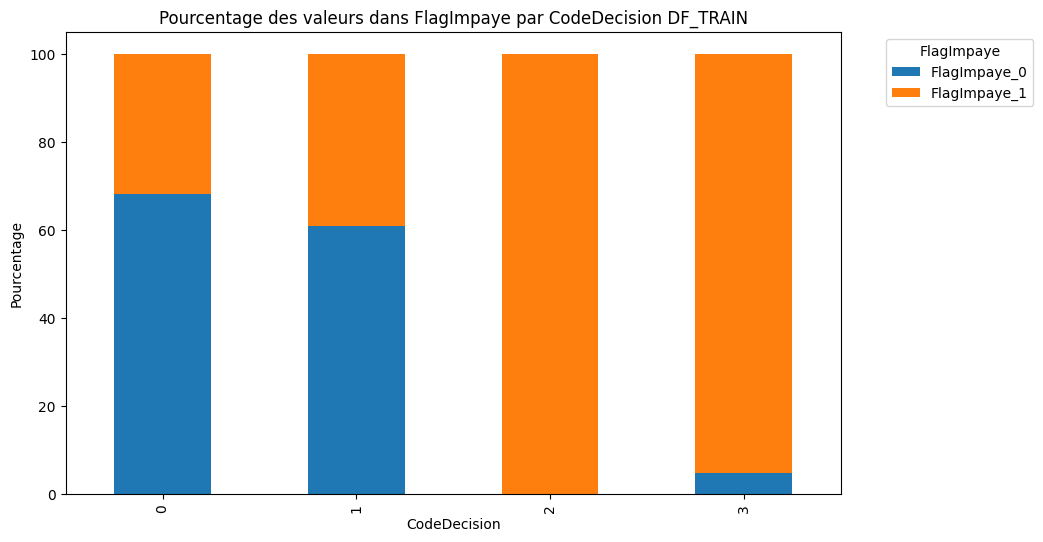

In [3]:
import matplotlib.pyplot as plt

table_correspondance = pd.crosstab(index=df_train['CodeDecision'], columns=df_train['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TRAIN')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

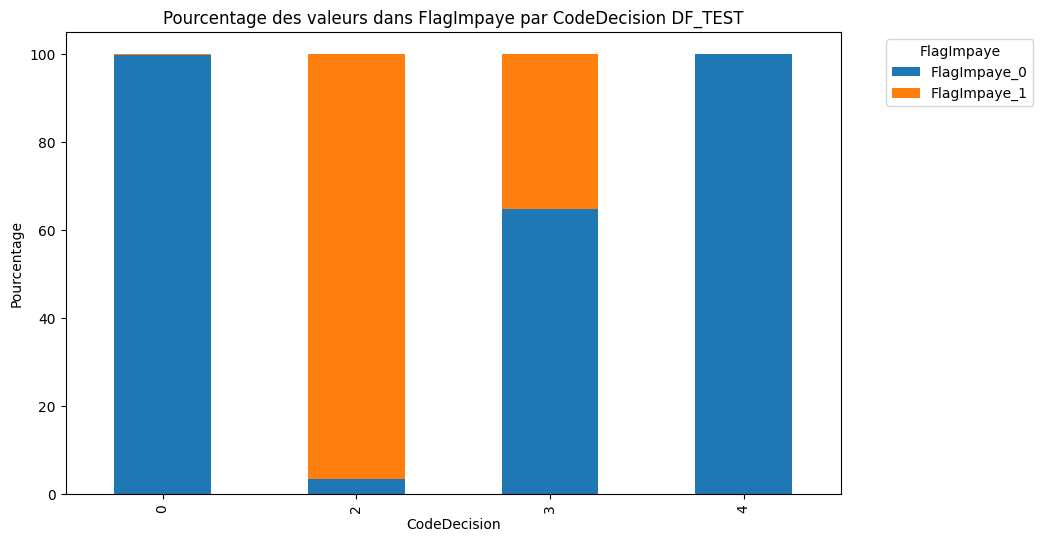

In [4]:

table_correspondance = pd.crosstab(index=df_test['CodeDecision'], columns=df_test['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TEST')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [5]:
# Code 0 Honnete
# Code 1 Honnete
# Code 2 FRAUDEUR
# Code 3 FRAUDEUR à 40%
# Code 4 que un seul dans toutes les données => inutile

<Axes: >

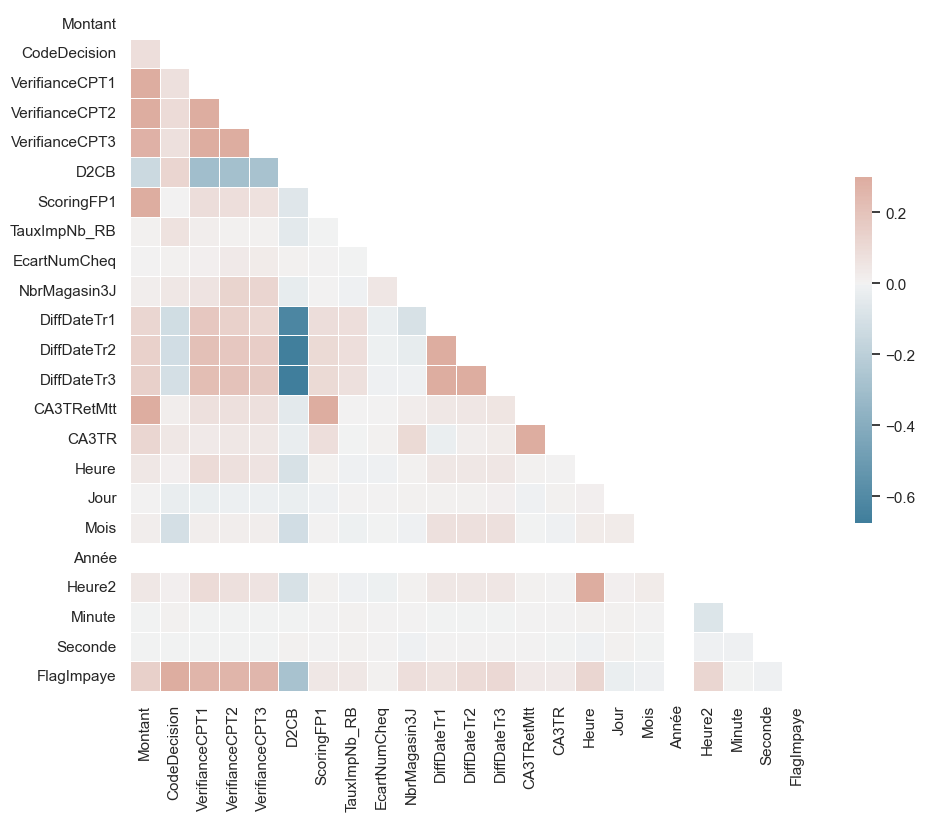

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
most_correlated_features = corr['CodeDecision'].abs().sort_values(ascending=False).index[1:]
print(most_correlated_features)
most_correlated_features = most_correlated_features[1:] # on enleve variable Flag Impaye
print(most_correlated_features)

Index(['FlagImpaye', 'DiffDateTr1', 'D2CB', 'DiffDateTr2', 'Mois',
       'DiffDateTr3', 'VerifianceCPT2', 'Montant', 'VerifianceCPT3',
       'VerifianceCPT1', 'TauxImpNb_RB', 'CA3TR', 'NbrMagasin3J', 'Jour',
       'CA3TRetMtt', 'Heure', 'Heure2', 'Minute', 'EcartNumCheq', 'Seconde',
       'ScoringFP1', 'Année'],
      dtype='object')
Index(['DiffDateTr1', 'D2CB', 'DiffDateTr2', 'Mois', 'DiffDateTr3',
       'VerifianceCPT2', 'Montant', 'VerifianceCPT3', 'VerifianceCPT1',
       'TauxImpNb_RB', 'CA3TR', 'NbrMagasin3J', 'Jour', 'CA3TRetMtt', 'Heure',
       'Heure2', 'Minute', 'EcartNumCheq', 'Seconde', 'ScoringFP1', 'Année'],
      dtype='object')


In [8]:
from sklearn.cluster import KMeans
import pickle as pckl

X_train = df_train[most_correlated_features]

# Clustering avec K-means
n_clusters = 3  # Vous pouvez ajuster le nombre de clusters en fonction de votre problème
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_train['Cluster_Code_Decision'] = kmeans.fit_predict(X_train)


# Sauvegarde du modèle
model_name = "kmeans"
filename = 'models/classif_code/' + model_name + '.pkl'
with open(filename, 'wb') as file:
    pckl.dump(kmeans, file)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,TauxImpNb_RB,EcartNumCheq,NbrMagasin3J,...,CA3TR,Heure,Jour,Mois,Année,Heure2,Minute,Seconde,FlagImpaye,Cluster_Code_Decision
0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,1.0,...,0.0,27134,1,2,2017,7,32,14,0,0
1,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,1.0,2.0,...,0.0,27817,1,2,2017,7,43,37,0,0
2,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,1.0,...,0.0,28058,1,2,2017,7,47,38,0,0
3,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,1.0,...,0.0,28128,1,2,2017,7,48,48,0,0
4,26.90,1,0.0,0.0,0.0,549.0,0.0,0.0,1.0,1.0,...,0.0,29607,1,2,2017,8,13,27,0,0


In [10]:
X_test = df_test[most_correlated_features]
df_test['Cluster_Code_Decision'] = kmeans.predict(X_test)


# Attribution de CodeDecision basée sur les statistiques descriptives
cluster_code_decision_mapping = df_train.groupby('Cluster_Code_Decision')['CodeDecision'].agg(lambda x: x.value_counts().idxmax()).to_dict()
df_test['CodeDecision'] = df_test['Cluster_Code_Decision'].map(cluster_code_decision_mapping)

# Affichage des résultats
print(df_test[['Cluster_Code_Decision', 'CodeDecision']])

        Cluster_Code_Decision  CodeDecision
0                           0             0
1                           0             0
2                           0             0
3                           0             0
4                           0             0
...                       ...           ...
747406                      0             0
747407                      0             0
747408                      0             0
747409                      0             0
747410                      0             0

[747411 rows x 2 columns]


In [11]:
# Table croisée entre Cluster, CodeDecision, et FlagImpaye pour les données test
res = pd.crosstab(index=[df_train['Cluster_Code_Decision'], df_train['CodeDecision']], columns=df_train['FlagImpaye'], margins=True, margins_name='Total')
print(res)

FlagImpaye                                0        1    Total
Cluster_Code_Decision CodeDecision                           
0                     0             2748724  1284156  4032880
                      1             1117810   715467  1833277
                      2                 550  1837005  1837555
                      3                1459    29194    30653
1                     0                2317     1977     4294
                      1                2021     1179     3200
                      2                   0     3864     3864
                      3                  16       69       85
2                     0                1529     1481     3010
                      1                1512      648     2160
                      2                   0      780      780
                      3                   2      120      122
Total                               3875940  3875940  7751880


In [12]:
df_train.to_csv('data//classif/dataframe_train.csv',index=False)
df_test.to_csv('data/classif/dataframe_test.csv',index=False)